<a href="https://colab.research.google.com/github/rutujaaa0509/Deep_Learning.Assignment/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1 - **`LOGISTIC  REGRESSION`**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df1 = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<ipython-input-7-e34788bb0b8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='left', data=df1, palette='viridis')


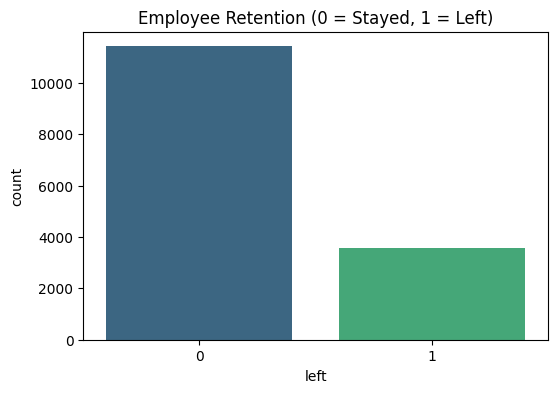

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='left', data=df1, palette='viridis')
plt.title('Employee Retention (0 = Stayed, 1 = Left)')
plt.show()

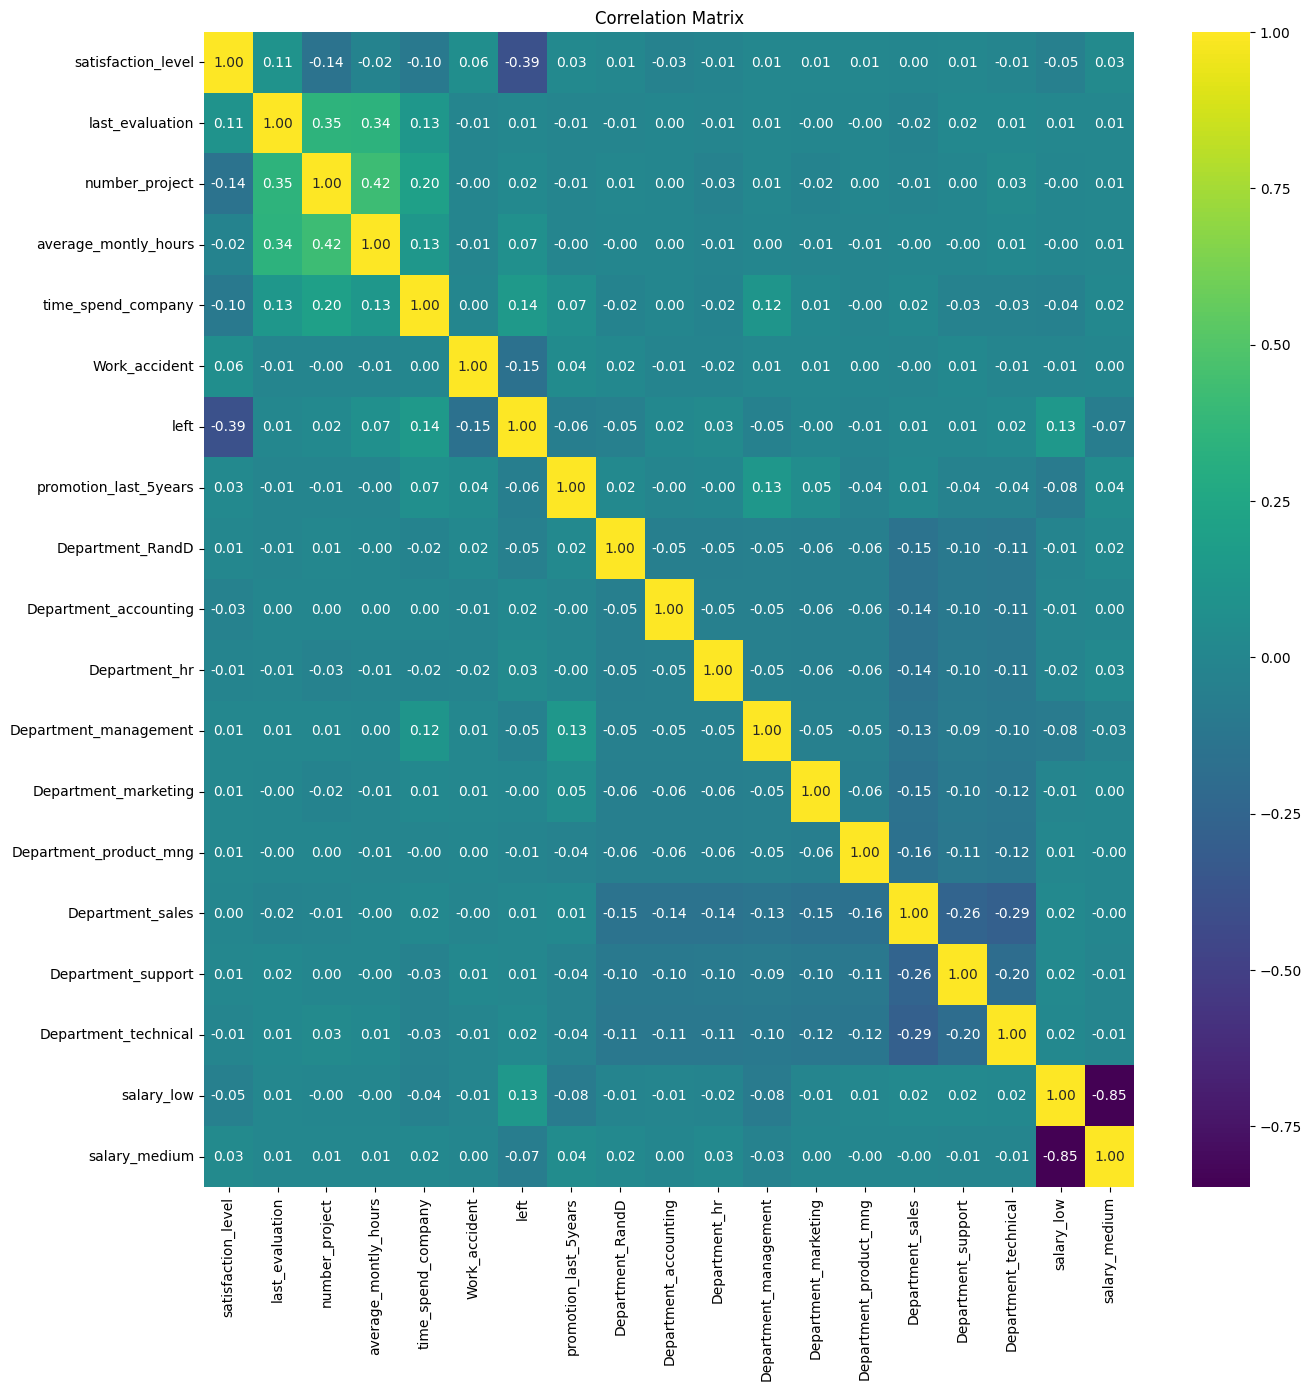

In [ ]:
# Encode categorical columns using one-hot encoding
data_encoded = pd.get_dummies(df1, columns=['Department', 'salary'], drop_first=True)

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', cbar=True)
plt.title('Correlation Matrix')
plt.show()

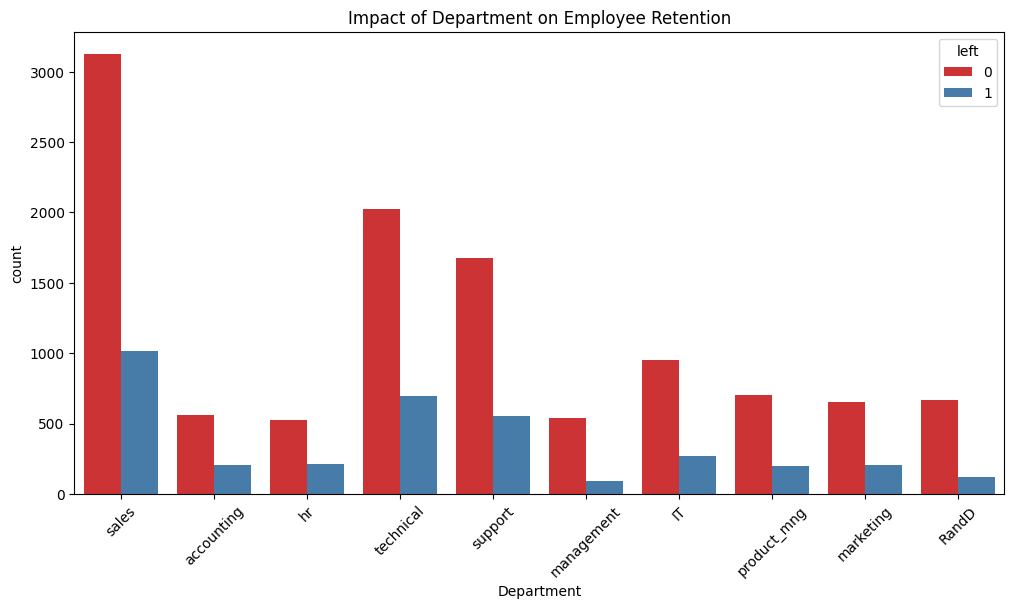

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Department', hue='left', data=df1, palette='Set1')
plt.title('Impact of Department on Employee Retention')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(df1[['satisfaction_level','last_evaluation','number_project']], df1.left, train_size = 0.8)

In [ ]:
X_test

,satisfaction_level,last_evaluation,number_project
5890,0.30,0.67,3
4721,0.37,0.61,3
13006,0.56,0.74,3
14716,0.11,0.97,6
11751,0.99,0.92,4
...,...,...,...
13738,0.25,0.89,4
2753,0.54,0.96,3
5051,0.62,0.52,3
4741,0.61,0.50,4


In [ ]:
X_train

,satisfaction_level,last_evaluation,number_project
1936,0.11,0.97,6
7740,0.50,0.53,3
8478,0.58,0.63,5
1353,0.79,0.97,4
7164,0.78,0.99,3
...,...,...,...
7698,0.96,0.60,4
503,0.43,0.51,2
5492,0.37,0.46,3
3966,0.82,0.58,4


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_test

,satisfaction_level,last_evaluation,number_project
5890,0.30,0.67,3
4721,0.37,0.61,3
13006,0.56,0.74,3
14716,0.11,0.97,6
11751,0.99,0.92,4
...,...,...,...
13738,0.25,0.89,4
2753,0.54,0.96,3
5051,0.62,0.52,3
4741,0.61,0.50,4


In [ ]:
y_test

,left
5890,0
4721,0
13006,0
14716,1
11751,0
...,...
13738,0
2753,0
5051,0
4741,0


In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
model.score(X_test,y_test)

0.7746666666666666

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_test

,left
5890,0
4721,0
13006,0
14716,1
11751,0
...,...
13738,0
2753,0
5051,0
4741,0


In [ ]:
model.predict_proba(X_test)

array([[0.50197772, 0.49802228],
       [0.59176847, 0.40823153],
       [0.72933195, 0.27066805],
       ...,
       [0.81958851, 0.18041149],
       [0.84377896, 0.15622104],
       [0.4564923 , 0.5435077 ]])

In [ ]:
model.score(X_test,y_test)

0.7746666666666666

In [ ]:
y_predicted

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
X_test

,satisfaction_level,last_evaluation,number_project
5890,0.30,0.67,3
4721,0.37,0.61,3
13006,0.56,0.74,3
14716,0.11,0.97,6
11751,0.99,0.92,4
...,...,...,...
13738,0.25,0.89,4
2753,0.54,0.96,3
5051,0.62,0.52,3
4741,0.61,0.50,4


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:', accuracy)

Model Accuracy: 0.7746666666666666
